#                Predict whether the employee should be promoted or not?


Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

* They first identify a set of employees based on recommendations/ past performance.
* Selected employees go through the separate training and evaluation program for each vertical.
* At the end, based on various factors such as training performance, an employee gets the promotion



**First,we will import all the necessary libraries required to do this project.**

In [1]:
#First we will import all the necessary libraries required to do this project.
#For mathematical operations
import numpy as np
#For dataframe operations
import pandas as pd
#For data vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#For size of the figures
plt.rcParams["figure.figsize"]=(16,5) #size of figures
#For style
plt.style.use("fivethirtyeight")

#For interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#For machine learning
import sklearn
import imblearn

## Reading the datasets
**->Here, we are having two datasets, i.e., Training and Testing Datasets.**\
**->We will read both the datasets.**\
**->Training Datasets is used to train the Machine learning Models.**\
**->After learning the patterns from the Testing Datasets, We have to predict the Target Variable.**

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#Shape of the dataset
print("Shape of the Training data",train.shape)
print("Shape of the Testing data",test.shape)

Shape of the Training data (54808, 14)
Shape of the Testing data (23490, 13)


In [4]:
#Head of the train data
train.head(6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0


In [5]:
#Head of the test data
test.head(6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68


In [6]:
#description of the data
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
train.info()
#This function gives the information of the data variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


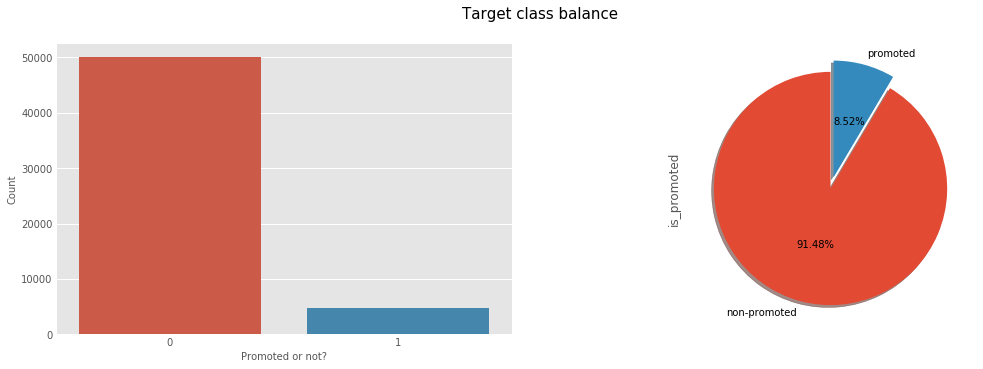

In [8]:
#Let's chech the target class balance
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("ggplot")

plt.subplot(1,2,1)
sns.countplot(train["is_promoted"],)
plt.xlabel("Promoted or not?",fontsize=10)
plt.ylabel("Count",fontsize=10)

plt.subplot(1,2,2)
train["is_promoted"].value_counts().plot(kind="pie",explode=[0,0.1],autopct="%.2f%%",
                                          startangle=90,labels=["non-promoted","promoted"],shadow=True,
                                         pctdistance=0.5)

plt.suptitle("Target class balance",fontsize=15)
plt.show()

we can easily, see that the Target Class is Highly Imbalanced, and we must balance these classes of Target Class.
Most of the Times, when we use Machine Learning Models with Imbalanced Classes, we have very poor Results which
are completely biased towards the class having Higher Distribution.

In [9]:
#Let's use sweetviz library to understand the complete EDA
#import sweetviz library
import sweetviz

In [10]:
my_report=sweetviz.compare([train,"train"],[test,"Test"],"is_promoted")
my_report.show_html("Report.html")

:FEATURES DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)


Creating Associations graph... DONE!
Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


You can find this report as another file

## Descriptive Statistics

**Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights**

In [11]:
#Checking the descriptive statistics for numerical columns
train.iloc[:,1:].describe().style.background_gradient(cmap="copper")

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
#Checking the descriptive statistics for categorial columns
train.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [13]:
#let's make an interactive function for numerical columns

@interact
def check(column=list(train.select_dtypes("number").columns[1:8])):
    print("Maximum value:",train[column].max())
    print("Minimum value:",train[column].min())
    print("Mean value:{0:.2f}".format(train[column].mean()))
    print("Median value:",train[column].median())
    print("Standard deviation:{0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

**This makes easier to vizualise the features**

## Missing values

In [14]:
#Checking the missing values

train_total=train.isnull().sum()

train_percent=((train.isnull().sum()/(train.shape[0])*100).round(2))

test_total=test.isnull().sum()

test_percent=((test.isnull().sum()/(test.shape[0])*100).round(2))

train_missing_data=pd.concat([train_total,train_percent,test_total,test_percent],axis=1,
                        keys=["train_total","train_percent","test_total","test_percent"],sort=True)

train_missing_data.style.bar(color = ["gold"])

,train_total,train_percent,test_total,test_percent
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


We can see from the above table that only are two columns have missing values ,i.e,education and previous year rating.
And both training and testing dataset have missing values. So,do not need to delete any missing values, it can be 
imputed using mean,median and mode operations. 

In [15]:
# Checking datatype of columns in the data
train.dtypes[train.isnull().any()]

education                object
previous_year_rating    float64
dtype: object

In [16]:
#Let's impute the missing values in training data
train["education"]=train["education"].fillna(train["education"].mode()[0])
train["previous_year_rating"]=train["previous_year_rating"].fillna(train["previous_year_rating"].mode()[0])

#Let's check whether there are any missing values in training data
print("Number of missing values left in training data:",train.isnull().sum().sum())

#Let's impute the missing values in testing data
test["education"]=test["education"].fillna(test["education"].mode()[0])
test["previous_year_rating"]=test["previous_year_rating"].fillna(test["previous_year_rating"].mode()[0])

#Let's check whether there are any missing values in testing data
print("Number of missing values left in testing data:",test.isnull().sum().sum())

Number of missing values left in training data: 0
Number of missing values left in testing data: 0


Imputed the missing values, using the Mode values, even for the previous year rating, it only seems to be numerical,
but in real it's also categorical.
After, Imputing the missing values in the training and testing data set we can see that there are no Null Values left
in any of the datasets.

So, we are done with the Treatment of the Missing Values.

## Outlier Detection

In [17]:
#Check for numerical columns
train.select_dtypes("number").head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


Text(0.5, 0, 'Length of service')

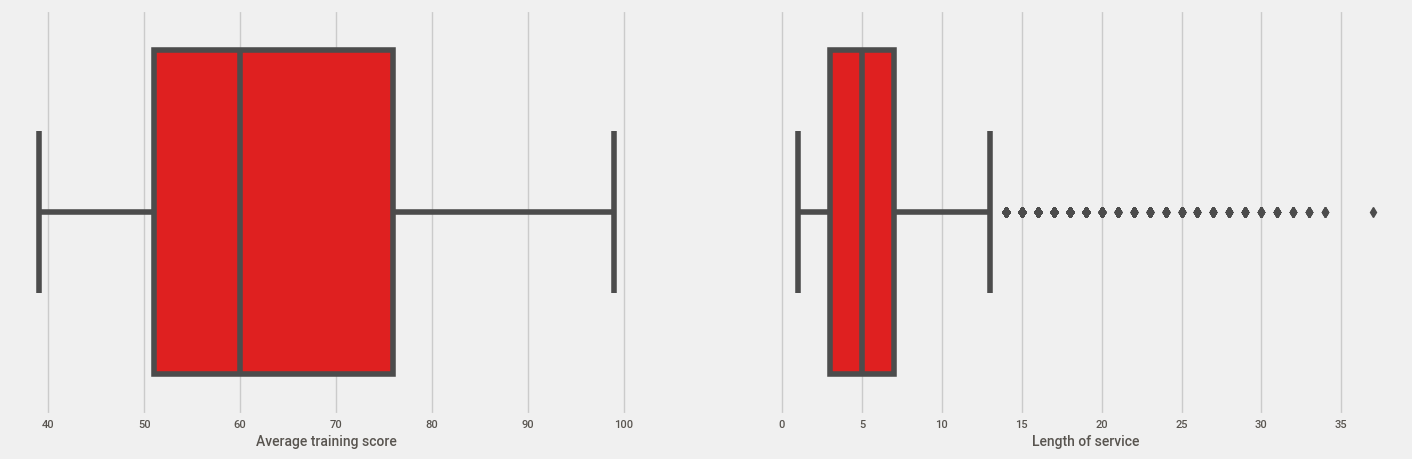

In [18]:
#Boxplot()
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

plt.subplot(1,2,1)
sns.boxplot(train["avg_training_score"],color="red")
plt.xlabel("Average training score",fontsize=10)

plt.subplot(1,2,2)
sns.boxplot(train["length_of_service"],color="red")
plt.xlabel("Length of service",fontsize=10)


## Univariate Analysis

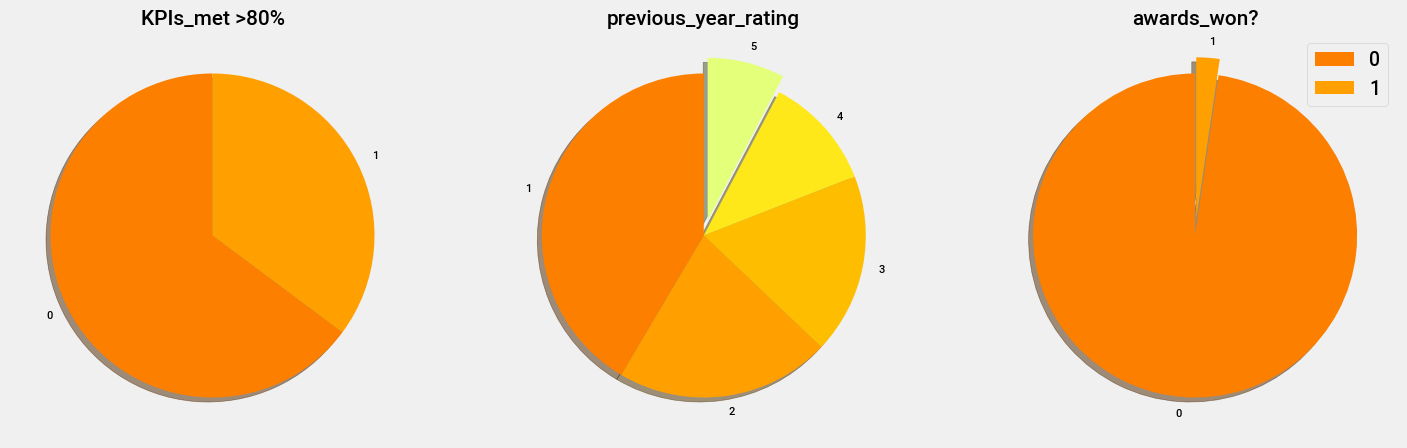

In [19]:
#Let's plot and analyse 
#Lets plot pie chart for the columns where we have very few categories
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

#plotting a pie chart to represent KPI's>80 of the Employees
plt.subplot(1,3,1)
labels=[0,1]
sizes=train["KPIs_met >80%"].value_counts()
colors=plt.cm.Wistia(np.linspace(1,0,5))
explode=[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,startangle=90,shadow=True)
plt.title("KPIs_met >80%",fontsize=15)

#plotting a pie chart to represent previous_year_rating of the Employees
plt.subplot(1,3,2)
labels=[1,2,3,4,5]
sizes=train["previous_year_rating"].value_counts()
colors=plt.cm.Wistia(np.linspace(1,0,5))
explode=[0,0,0,0,0.1]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,startangle=90,shadow=True)
plt.title("previous_year_rating",fontsize=15)

#plotting a pie chart to represent awards_won? of the Employees
plt.subplot(1,3,3)
labels=[0,1]
sizes=train["awards_won?"].value_counts()
colors=plt.cm.Wistia(np.linspace(1,0,5))
explode=[0,0.1]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,startangle=90,shadow=True)
plt.title("awards_won?",fontsize=15)

plt.legend()
plt.show()

We, can see that there are some pie charts, we have for representing KPIs, Previous year Ratings, and Awards Won?

Also, The one Big Pattern is that only some of the employees could reach above 80% of KPIs set.
Most of the Employees have a very low rating for the previous year, and
very few employees, probably 2% of them could get awards for their work, which is normal.

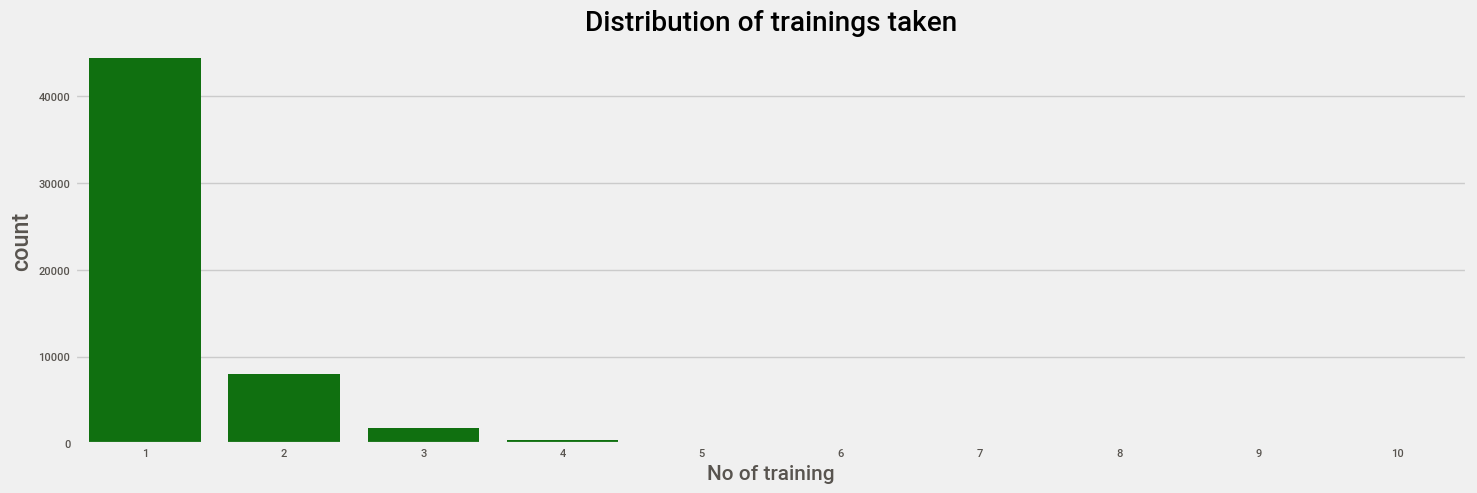

In [20]:
plt.rcParams["figure.figsize"]=(16,5)
plt.style.use("fivethirtyeight")

sns.countplot(train["no_of_trainings"],color="green")
plt.xlabel("No of training",fontsize=15)
plt.title("Distribution of trainings taken")
plt.show()

we can see that 80% of employees have taken only one time training and very less employees after.

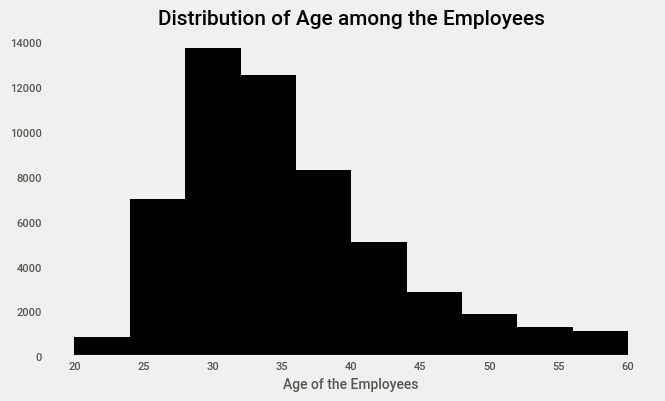

In [21]:
#Let's check the age of employees
plt.rcParams["figure.figsize"] = (7, 4)
plt.hist(train["age"], color = "black")
plt.title("Distribution of Age among the Employees",fontsize=15)
plt.xlabel("Age of the Employees",fontsize=10)
plt.grid()
plt.show()

Most of the employee's age is in between 27-37yrs. 

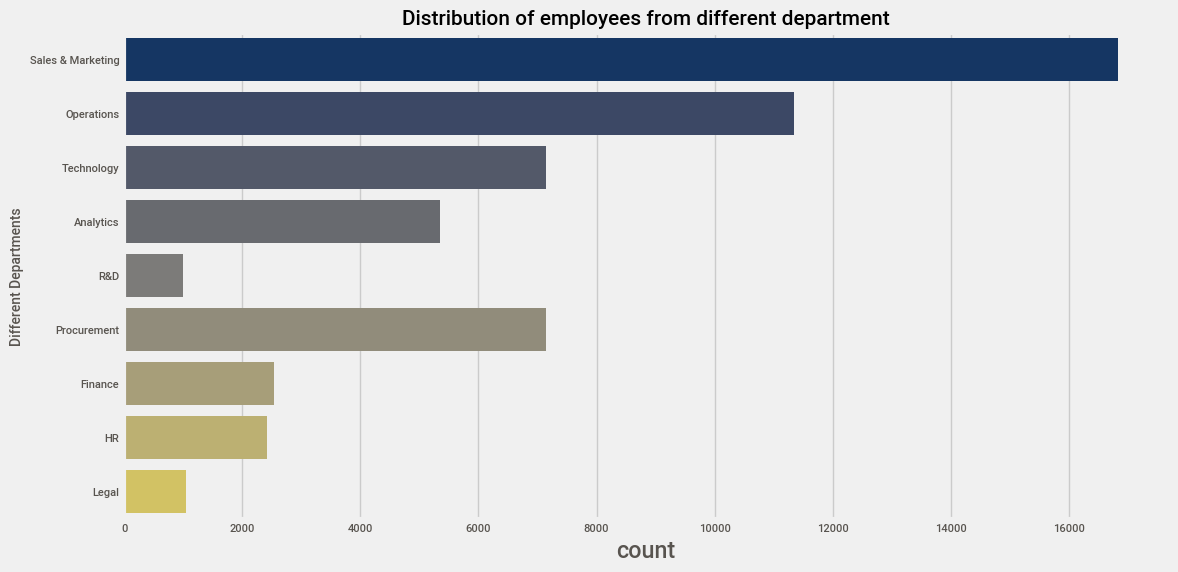

In [22]:
#Let's the the number of employees in different departments
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(y=train["department"],palette="cividis",orient="v")
plt.ylabel("Different Departments",fontsize=10)
plt.title("Distribution of employees from different department",fontsize=15)
plt.show()

From above, we can see that more number of employees are sales & marketing and operations. And there are is almost equal number of employees in technology and procurement.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text xticklabel objects>)

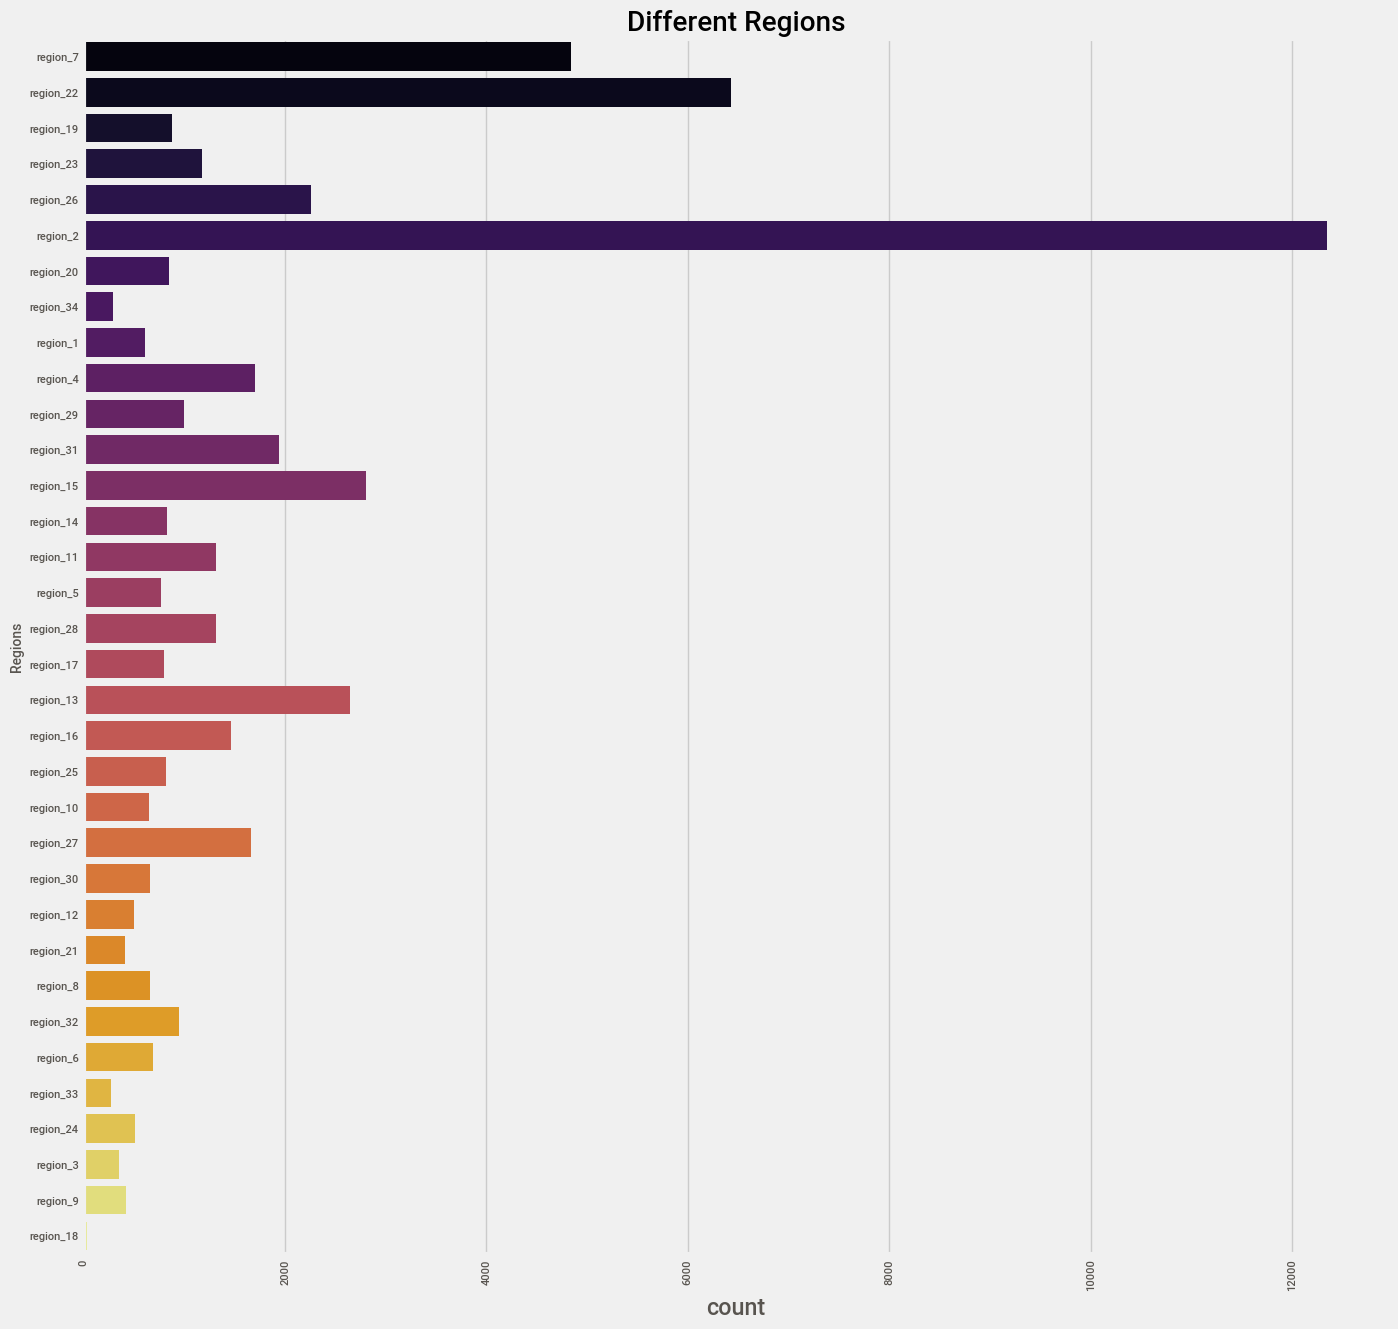

In [23]:
plt.rcParams["figure.figsize"] = (15,15)
plt.style.use("fivethirtyeight")

sns.countplot(y=train["region"], palette = 'inferno', orient = 'v')
plt.ylabel("Regions",fontsize=10)
plt.title("Different Regions")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'recruitment_channel')

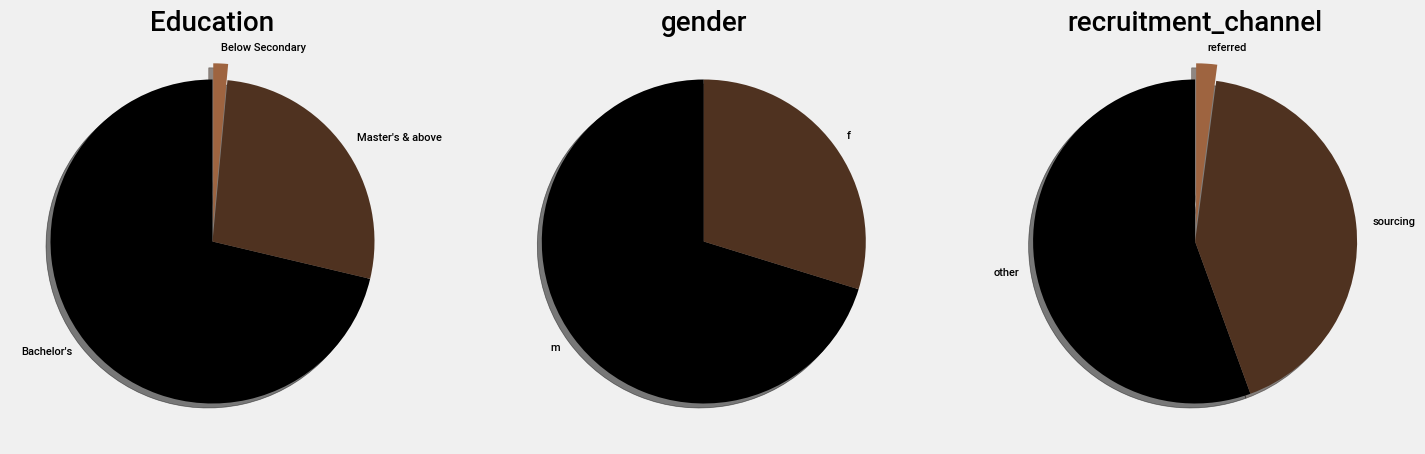

In [24]:
plt.rcParams["figure.figsize"]=(16,5)


plt.subplot(1,3,1)
labels=train["education"].value_counts().index
sizes=train["education"].value_counts()
colors=plt.cm.copper(np.linspace(0,1,5))
explode=[0,0,0.1]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title("Education", fontsize = 20)

plt.subplot(1,3,2)
labels=train["gender"].value_counts().index
sizes=train["gender"].value_counts()
colors=plt.cm.copper(np.linspace(0,1,5))
explode=[0,0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title("gender", fontsize = 20)

plt.subplot(1,3,3)
labels=train["recruitment_channel"].value_counts().index
sizes=train["recruitment_channel"].value_counts()
colors=plt.cm.copper(np.linspace(0,1,5))
explode=[0,0,0.1]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('recruitment_channel', fontsize = 20)


From above pie plots :
    More number of employees are from bachelor's, male as a gender .
    Souring and other were the most recruitment channels.

## Bivariate Analysis

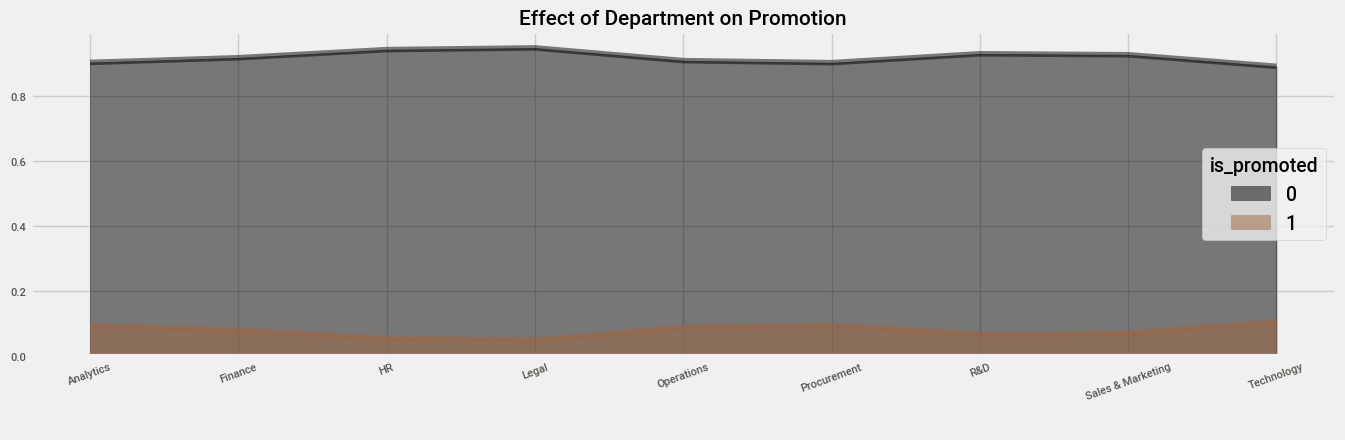

In [25]:
# lets compare the effect of different Departments and Promotion

plt.rcParams["figure.figsize"] = (15,4)
x = pd.crosstab(train["department"], train["is_promoted"])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = "area", stacked = False, color = colors)
plt.title("Effect of Department on Promotion", fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion. Also, this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

Text(0.5, 0, '')

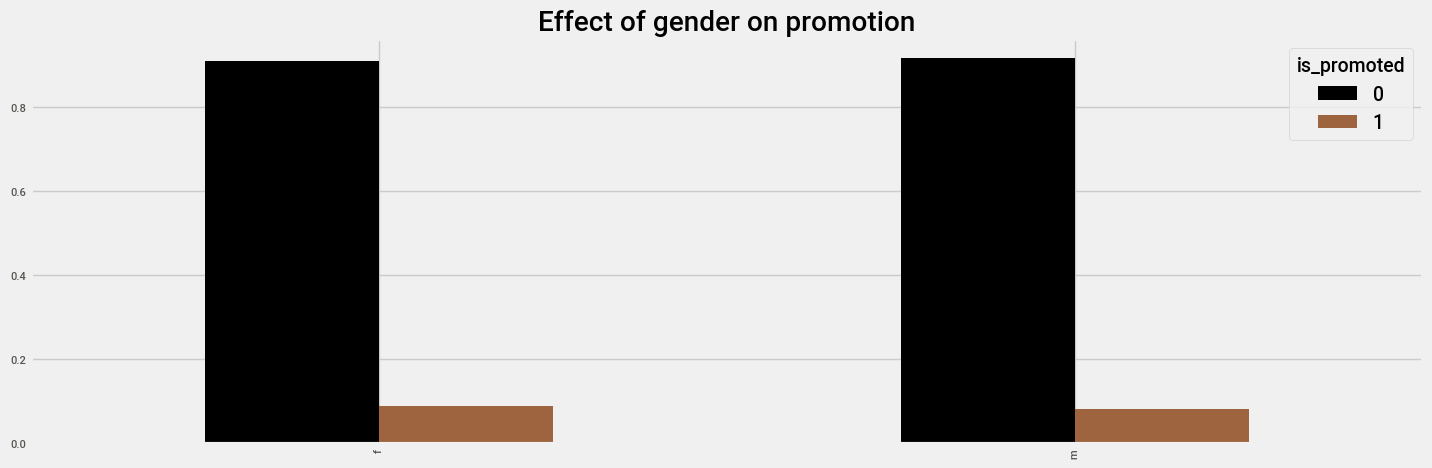

In [26]:
# Lets compare the Gender Gap in the promotion

plt.rcParams["figure.figsize"]=(16,5)
x=pd.crosstab(train["gender"],train["is_promoted"])
colors=plt.cm.copper(np.linspace(0,1,3))
x.div(x.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,color=colors)
plt.title("Effect of gender on promotion")
plt.xlabel("")

From we can see that they are competing with their Men Counterparts neck-to-neck. That's a great Inference.

Text(0.5, 1.0, 'Effect of Age on Promotion')

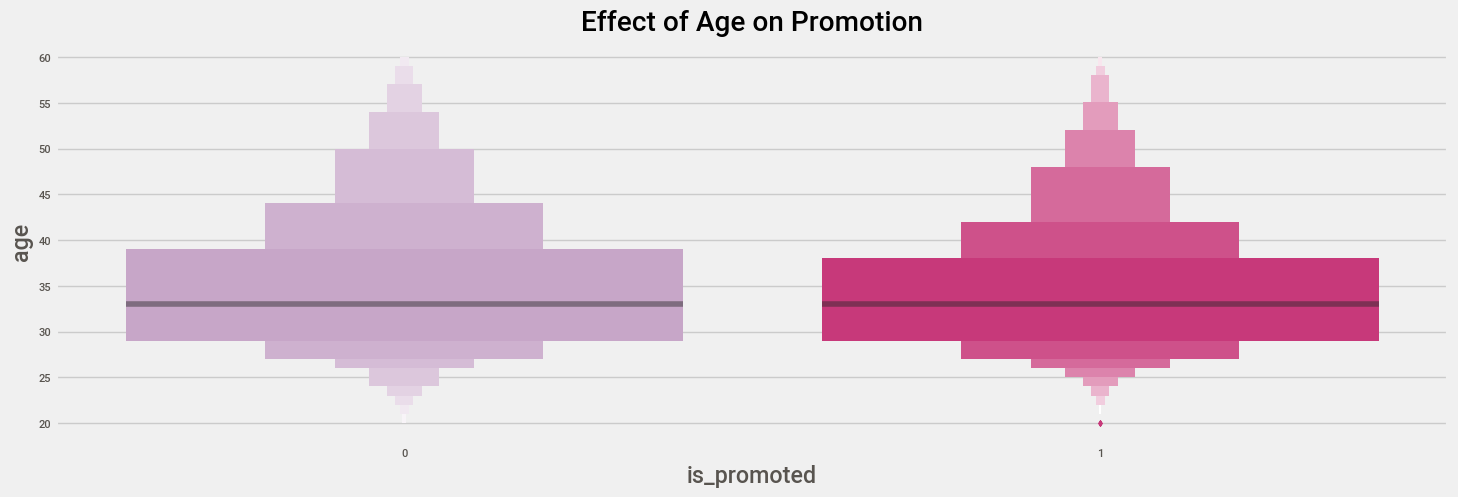

In [27]:
#Let's check the effect of age on promotion

plt.rcParams["figure.figsize"]=(16,5)
sns.boxenplot(y=train["age"],x=train["is_promoted"],palette="PuRd")
plt.title("Effect of Age on Promotion")

we can see that the average age for promotion is from 30-35yrs.

Text(0.5, 0, 'Departments')

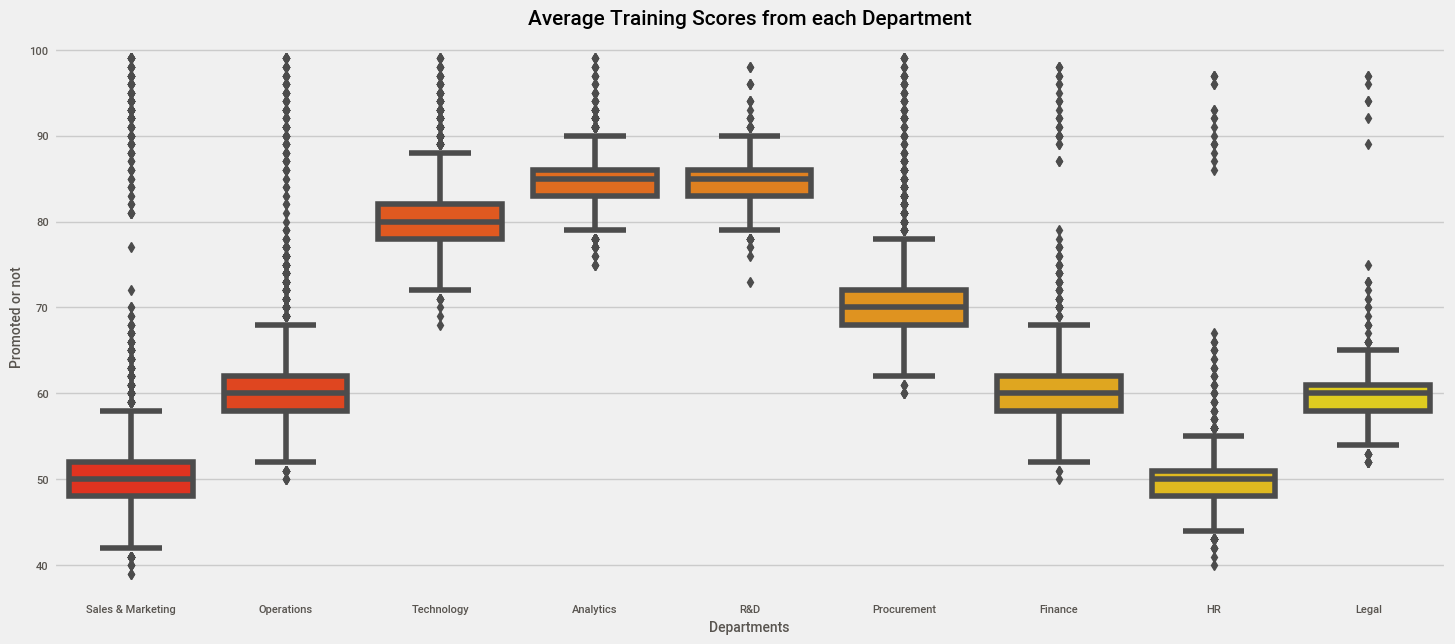

In [28]:
#Let's check the average training score and department

plt.rcParams["figure.figsize"] = (16, 7)
plt.style.use("fivethirtyeight")
sns.boxplot(train["department"], train["avg_training_score"], palette = "autumn")
plt.title("Average Training Scores from each Department", fontsize = 15)
plt.ylabel("Promoted or not", fontsize = 10)
plt.xlabel("Departments", fontsize = 10)

So, here we can see that the more number of chances of getting promotion are for technology, analytics and R&D departments.

In [29]:
plt.rcParams["figure.figsize"] = (16, 7)
@interact_manual
def bivariateplot(column1=list(train.select_dtypes("object").columns),
                  column2=list(train.select_dtypes("number").columns[1:])):
    sns.violinplot(train[column1],train[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

Interactive functions helped us to plot this beautiful plots.
We can select any of the columns and run the function to vizualize varios plots.

## Multivariate Analysis

Text(0.5, 1, 'Correlation Heat Map')

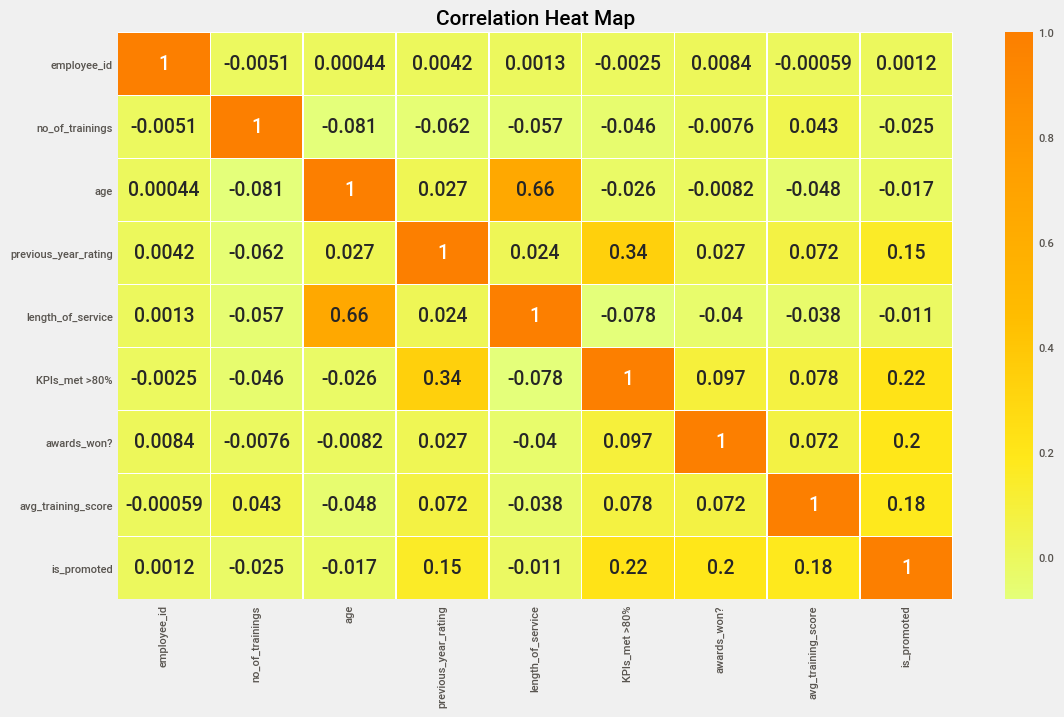

In [30]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams["figure.figsize"] = (12, 7)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = "Wistia")
plt.title("Correlation Heat Map", fontsize = 15)

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated,
Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.

## Feature Engineering

In [31]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train["sum_metric"]=train["awards_won?"]+train["KPIs_met >80%"]+train["previous_year_rating"]
test["sum_metric"]=test["awards_won?"]+test["KPIs_met >80%"]+test["previous_year_rating"]

#creating a total score column
train["total_score"]=train["avg_training_score"]*train["no_of_trainings"]
test["total_score"]=test["avg_training_score"]*test["no_of_trainings"]

In [32]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train=train.drop(["recruitment_channel", "region", "employee_id"], axis = 1)
test=test.drop(["recruitment_channel", "region", "employee_id"], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

## Grouping and filtering operations

In [33]:
# lets check the no. eployees who won awards from each Department

train[["department", "awards_won?"]].groupby(["department"]).agg("sum").sort_values(by = "awards_won?",
                                                            ascending = False).style.background_gradient("magma")

,awards_won?
department,
Sales & Marketing,361
Operations,262
Technology,185
Procurement,171
Analytics,130
Finance,70
HR,45
Legal,25
R&D,21


In [34]:
# lets group the employees based on their Education

@interact
def group(column = list(train.select_dtypes("object").columns)):
    return train[[column, "is_promoted"]].groupby([column]).agg(["count",
                                                "sum", "mean","min","max"]).style.background_gradient(cmap = "viridis")

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [35]:
## lets use the interactive function to make it more reusable

@interact
def group_operations(column = list(train.select_dtypes("object").columns),
                     column2 = list(train.select_dtypes("number").columns)[1:]):
    return train[[column, column2]].groupby([column]).agg("count").style.background_gradient(cmap = "Wistia")

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [36]:
# lets get the names of all the employees who have taken trainings more than 7 Times

@interact
def check(column = "no_of_trainings", x = 5):
    y = train[train["no_of_trainings"] > x]
    return y["is_promoted"].value_counts()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

In [37]:
# lets also check the value counts of the number of trainings employee took.
train["no_of_trainings"].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [38]:
# lets cap the values of number of trainings after 5, as the chances of promotion is negligible after 5th training 

train["no_of_trainings"] = train["no_of_trainings"].replace((6, 7, 8, 9, 10),(5, 5, 5, 5, 5))

# lets check the values of no. of trainings after capping the values
train["no_of_trainings"].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In [39]:
#lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
#and avg_training score is less than 40
#but, still got promotion.
 
train[(train["KPIs_met >80%"] == 0) & (train["previous_year_rating"] == 1.0) & 
      (train["awards_won?"] == 0) & (train["avg_training_score"] < 60) & (train["is_promoted"] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [40]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train["KPIs_met >80%"] == 0) & (train["previous_year_rating"] == 1.0) & 
      (train["awards_won?"] == 0) & (train["avg_training_score"] < 60) & (train["is_promoted"] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [41]:
# lets check how many of the employees have greater than 30 years of service and still do not get promotion

@interact
def check_promotion(x = 20):
    x = train[(train["length_of_service"] > x)]
    return x["is_promoted"].value_counts()

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

## Dealing with Categorical Columns

In [42]:
## Lets check the categorical columns present in the data
train.select_dtypes("object").head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [43]:
# lets check the value counts for the education column
train["education"].value_counts()

Bachelor's          39076
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [44]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [45]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50


## Splitting the Data

In [46]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x Test : (23490, 12)


## Resampling

In [47]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [48]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


In [49]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 12)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 12)


## Feature Scaling

In [50]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Machine Learning Predictive Modelling

In [51]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


Training Accuracy : 0.9906137814120463
Testing Accuracy : 0.9337854008775429


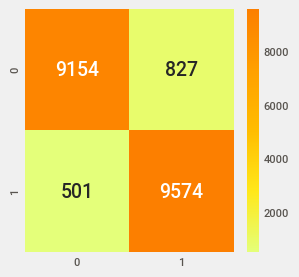

In [52]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams["figure.figsize"] = (3, 3)
sns.heatmap(cm, annot = True, cmap = "Wistia", fmt = ".8g")

## Feature Selection for Decision Tree Model

In [53]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = "accuracy")
rfecv = rfecv.fit(x_train, y_train)

print("Optimal number of features :", rfecv.n_features_)
x_train = pd.DataFrame(x_train)
print("Best features :", x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


As, we can clearly see that Decision Tree Classifier works much better as there are so many attributes which are are equally contributing to the cause, and generally linear Models such as Logistic Regression, wont perform very good, also there is a clear result using RFECV for feature selection, we can see that all the features are Important for Building the Model.

So, we go with the Decision Trees, but a Decision Tree has so many Parameters, lets check whether we can improve our Decision Tree Classifier Model, by changing some of the Default Parameters.

In [54]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9981
           1       0.92      0.95      0.94     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [55]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.250684,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.589462,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,5.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


In [56]:
# lets perform some Real time predictions on top of the Model that we just created using Decision Tree Classifier

# lets check the parameters we have in our Model
'''
department -> The values are from 0 to 8, (Department does not matter a lot for promotion)
education -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1
gender -> the values are 0 for female, and 1 for male
no_of_trainings -> the values are from 0 to 5
age -> the values are from 20 to 60
previou_year_rating -> The values are from 1 to 5
length_of service -> The values are from 1 to 37
KPIs_met >80% -> 0 for Not Met and 1 for Met
awards_won> -> 0-no, and 1-yes
avg_training_score -> ranges from 40 to 99
sum_metric -> ranges from 1 to 7
total_score -> 40 to 710
'''

'\ndepartment -> The values are from 0 to 8, (Department does not matter a lot for promotion)\neducation -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1\ngender -> the values are 0 for female, and 1 for male\nno_of_trainings -> the values are from 0 to 5\nage -> the values are from 20 to 60\npreviou_year_rating -> The values are from 1 to 5\nlength_of service -> The values are from 1 to 37\nKPIs_met >80% -> 0 for Not Met and 1 for Met\nawards_won> -> 0-no, and 1-yes\navg_training_score -> ranges from 40 to 99\nsum_metric -> ranges from 1 to 7\ntotal_score -> 40 to 710\n'

In [57]:
prediction = rfecv.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


#### Here comes to an end, where we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.

#### We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model.